# Diabetes Prediction using Machine Learning

### Business Understanding

#### How this project can improve the diabetes detection?
- This project will shhoecase how a person has diabetes or not that can be detected by few information of a patient.

#### Will this project improve patient outcome?
- By analyzing patient data, healthcare providers can develop personalized treatment plans tailored to individual needs, leading to better patient outcomes. Moreover identifying risk factors and patterns associated with diabetes can lead to early detection and preventive measures.

#### How can we enhance diabetes service?
- Healthcare organizations can make informed decisions based on data analysis, leading to improved service delivery and patient satisfaction. Aditionally analyzing patient outcomes and treatment effectiveness can help in continuously improving the quality of care provided.

## Data Understanding

#### Import necessary libraries

In [107]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, \
    classification_report

### GATHER DATA

In [110]:
#download the dataset freom https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes/data

# Load the dataset
file_path = 'C:/Users/nn/Downloads/Healthcare-Diabetes.csv'  # Replace with your CSV file path
#load the dataset from local space by pandas
df = pd.read_csv(file_path)

### ASSESS DATA
#### From this code we have a quick overview of the dataset's contents, including a preview of the columns and their corresponding values.
##### Here we have important columns such as Pregnancies , Glucose  , BloodPressure  , SkinThickness , Insulin, BMI, Age and lastly the outcome is if a person has diabetes (1) or not (0)

In [113]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


#### From this line of code , we can get an overview of the column name and numbers, count of the row and the data type.

In [116]:
print("Overall information of dataset:")
print(df.info())

Overall information of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB
None


### Checking for missing values
#### Importance for handling missing values:
- If a column has a small number of missing values relative to the dataset size, we may choose to fill them using mean/median.
- If a column has many missing values and is not crucial, we might drop it to prevent bias in analysis.
##### In this case, we will analyze missing values before deciding the approach. After running the code, we can decide there is no missing value in this dataset.

In [119]:
# Check for missing values
print("\nSummary of missing values:")
print(df.isnull().sum())


Summary of missing values:
Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### For the basic statistics of the dataset, we run the below line of code, which tells us the mean, standard deviation and different aspects of each feature.

In [122]:
# Basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(df.describe())


Basic statistics of the dataset:
                Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     692.750000     1.000000    99.000000      62.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean     80.127890    32.137392                  0.471193    33.132225   
std     112.301933     8.076127          

### CLEAN DATA
#### Drop ID column as it is not relevant for analysis

In [125]:
# Drop the ID column
df = df.drop(columns=['Id'])

#### Function for detecting and removing statistical outliers
##### We can use this function to clean your DataFrame by removing extreme outliers based on the Z-score method.

In [128]:
def remove_outliers(df, threshold=3):
    """
    Identifies and removes outliers using the Z-score method.
    
    Parameters:
    df (DataFrame): The input data frame containing numerical features.
    threshold (int): The Z-score threshold above which data points are considered outliers.
    
    Returns:
    DataFrame: A cleaned dataframe without extreme outliers.
    """
    # Calculate Z-scores of numerical columns
    z_scores = stats.zscore(df.select_dtypes(include=[np.number]))
    
    # Filter out rows where any Z-score is above the threshold
    return df[(np.abs(z_scores) < threshold).all(axis=1)]

#### This function will help you identify and remove outliers from your dataset, making it cleaner and more suitable for analysis.

In [131]:
#Apply outlier removal
df = remove_outliers(df)

## Analyse data

### Density plot of individual features
#### Density plot is an important analysis for the distribution of the features. By analyzing density plots, we can gain valuable insights into the characteristics and distribution of individual features, which can inform data preprocessing and modeling decisions. From this density plot, few observatios: 
- Density Plot of Glucose: A right-skewed distribution indicates that lower glucose levels are more common, but there are some individuals with significantly high glucose levels.
- Density Plot of BMI: A bell-shaped distribution centered around 30 suggests that most individuals have a BMI close to this value. A few individuals might have very high or very low BMI values.
- Density Plot of Age:  as there are multiple peaks, it indicates the presence of different age groups within the dataset.


C:\Users\nn\AppData\Local\Temp\ipykernel_10440\3499562806.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True, ax=ax)
C:\Users\nn\AppData\Local\Temp\ipykernel_10440\3499562806.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True, ax=ax)
C:\Users\nn\AppData\Local\Temp\ipykernel_10440\3499562806.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True, ax=ax)
C:\Users\nn\AppData\Local\Temp\ipykernel_10440\3499562806.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; plea

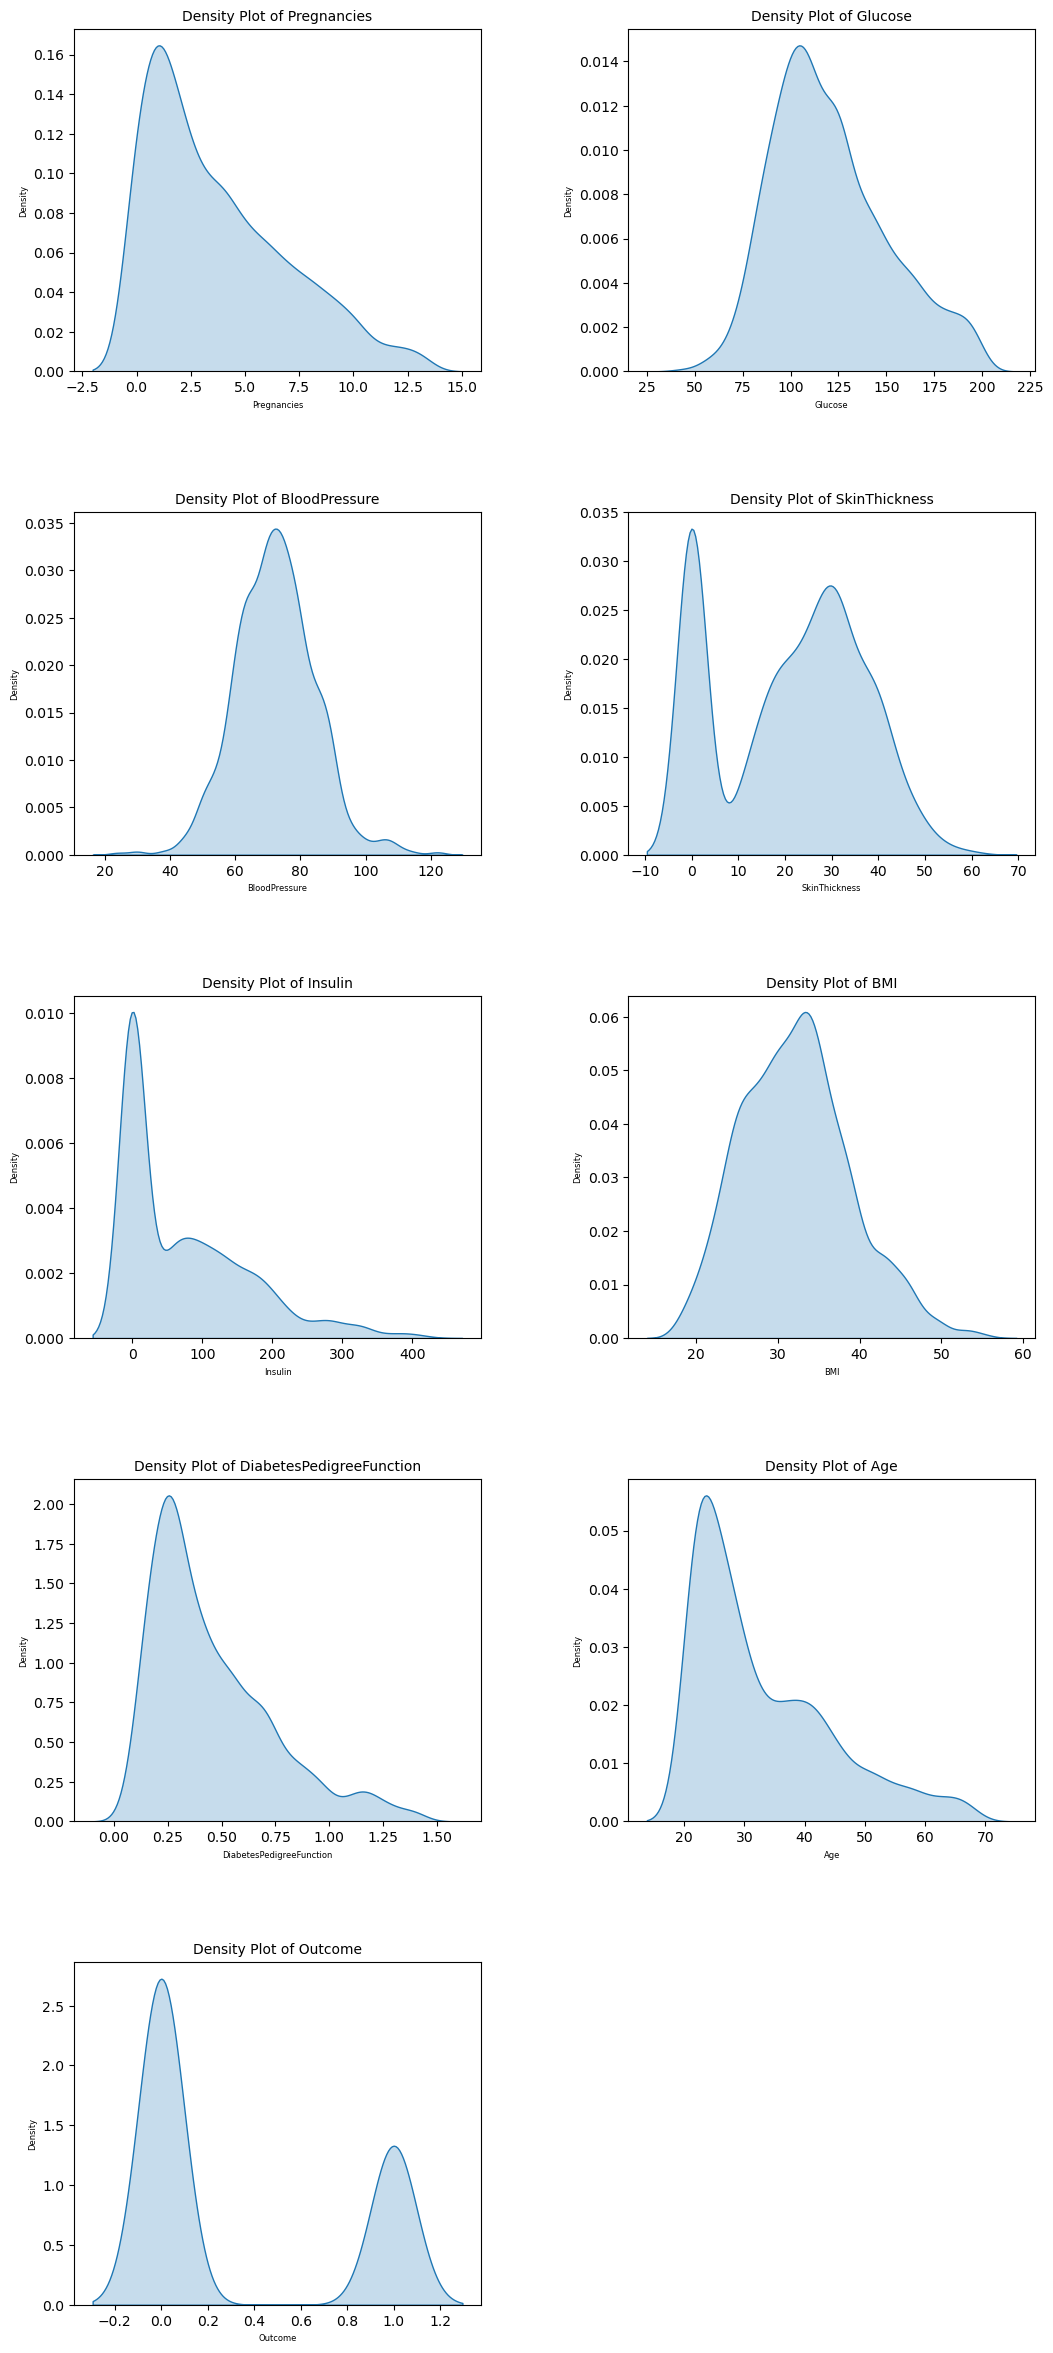

In [135]:

# Extract numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns

# Set the number of rows and columns for the subplots
n_rows = (len(numerical_features) + 1) // 2  # 2 columns

fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 5))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for i, feature in enumerate(numerical_features):
    ax = axes[i]
    sns.kdeplot(df[feature], shade=True, ax=ax)
    ax.set_title(f'Density Plot of {feature}', fontsize=10)
    ax.set_xlabel(feature, fontsize=6)
    ax.set_ylabel('Density', fontsize=6)

# Remove any empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(pad=6.0)  # Adjust spacing
plt.show()

### Scatterplot of features vs age and outcome
##### The plots display the relationship between Age (x-axis) and various health metrics (y-axis), categorized by Outcome (0 for no diabetes and 1 for diabetes). Some findingd from the scatter plot are:
- There is a noticeable concentration of pregnancies in the age range of 20 to 40.
- Blood Pressure, Insulin, Diabetes Pedigree Function, and Skin Thickness metrics do not show a clear trend with age and are scattered.
- Glucose and BMI have Higher values of metrics are more commonly associated with diabetic patients, indicating their potential role in diabetes risk.

#### What is the relationship between BMI and diabetes?
      - Individuals with higher BMI tend to have higher glucose levels, increasing diabetes risk.

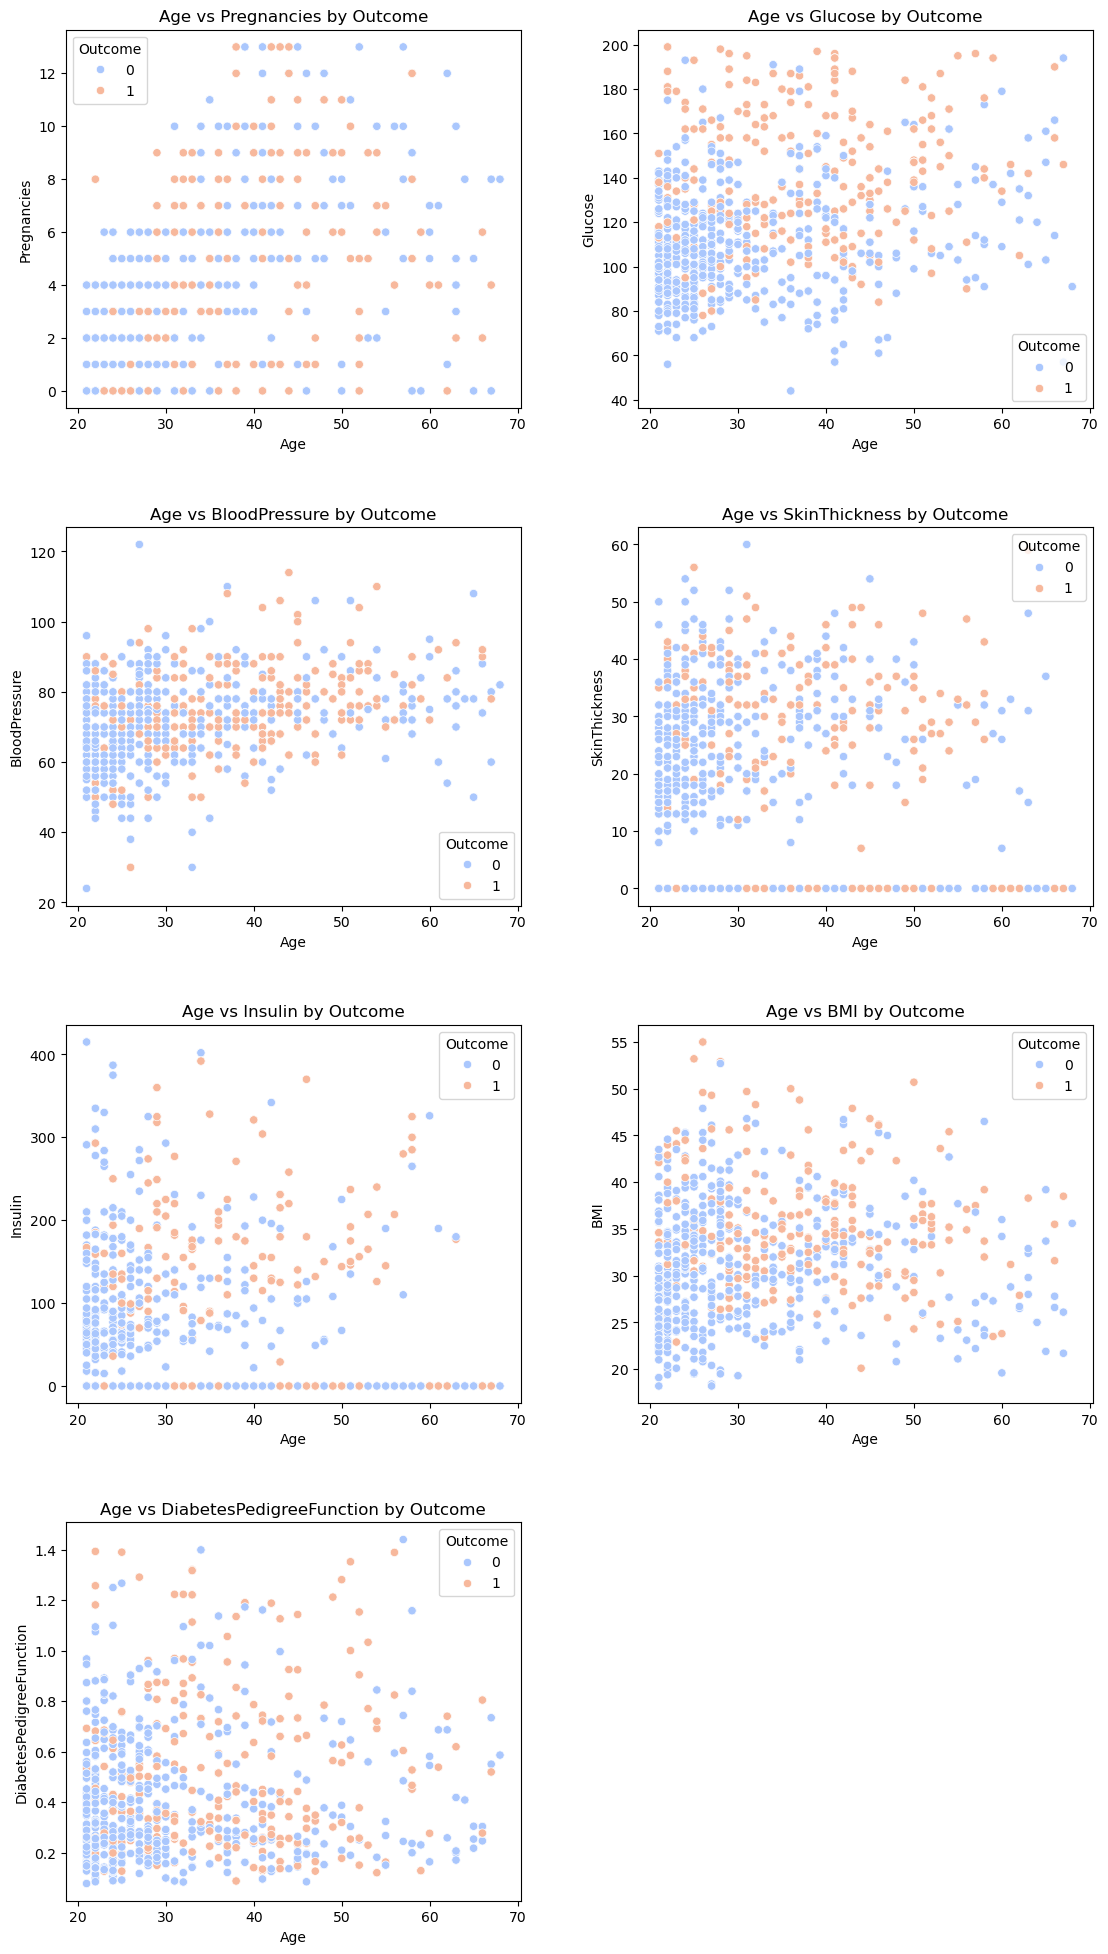

In [138]:
# Extract relevant columns
x_column = 'Age'
outcome_column = 'Outcome'
numerical_features = df.select_dtypes(include=[np.number]).columns.drop([x_column, outcome_column])

# Set the number of rows and columns for the subplots
# n_rows = (len(numerical_features) + 1) // 2  # 2 columns

fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 5))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for i, feature in enumerate(numerical_features):
    ax = axes[i]
    sns.scatterplot(data=df, x=x_column, y=feature, hue=outcome_column, palette='coolwarm', ax=ax)
    ax.set_title(f'{x_column} vs {feature} by {outcome_column}', fontsize=12)
    ax.set_xlabel(x_column, fontsize=10)
    ax.set_ylabel(feature, fontsize=10)

# Remove any empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(pad=4.0)  # Adjust spacing
plt.show()

### Box plot for data analysis

#### Box plots to identify trends between diabetes outcome and key health indicators. Few importante questions observed from the above plots and the below box plot analysis:

- How do glucose levels differ between diabetic and non-diabetic individuals?
  - Higher glucose levels are strongly correlated with a diabetes diagnosis.


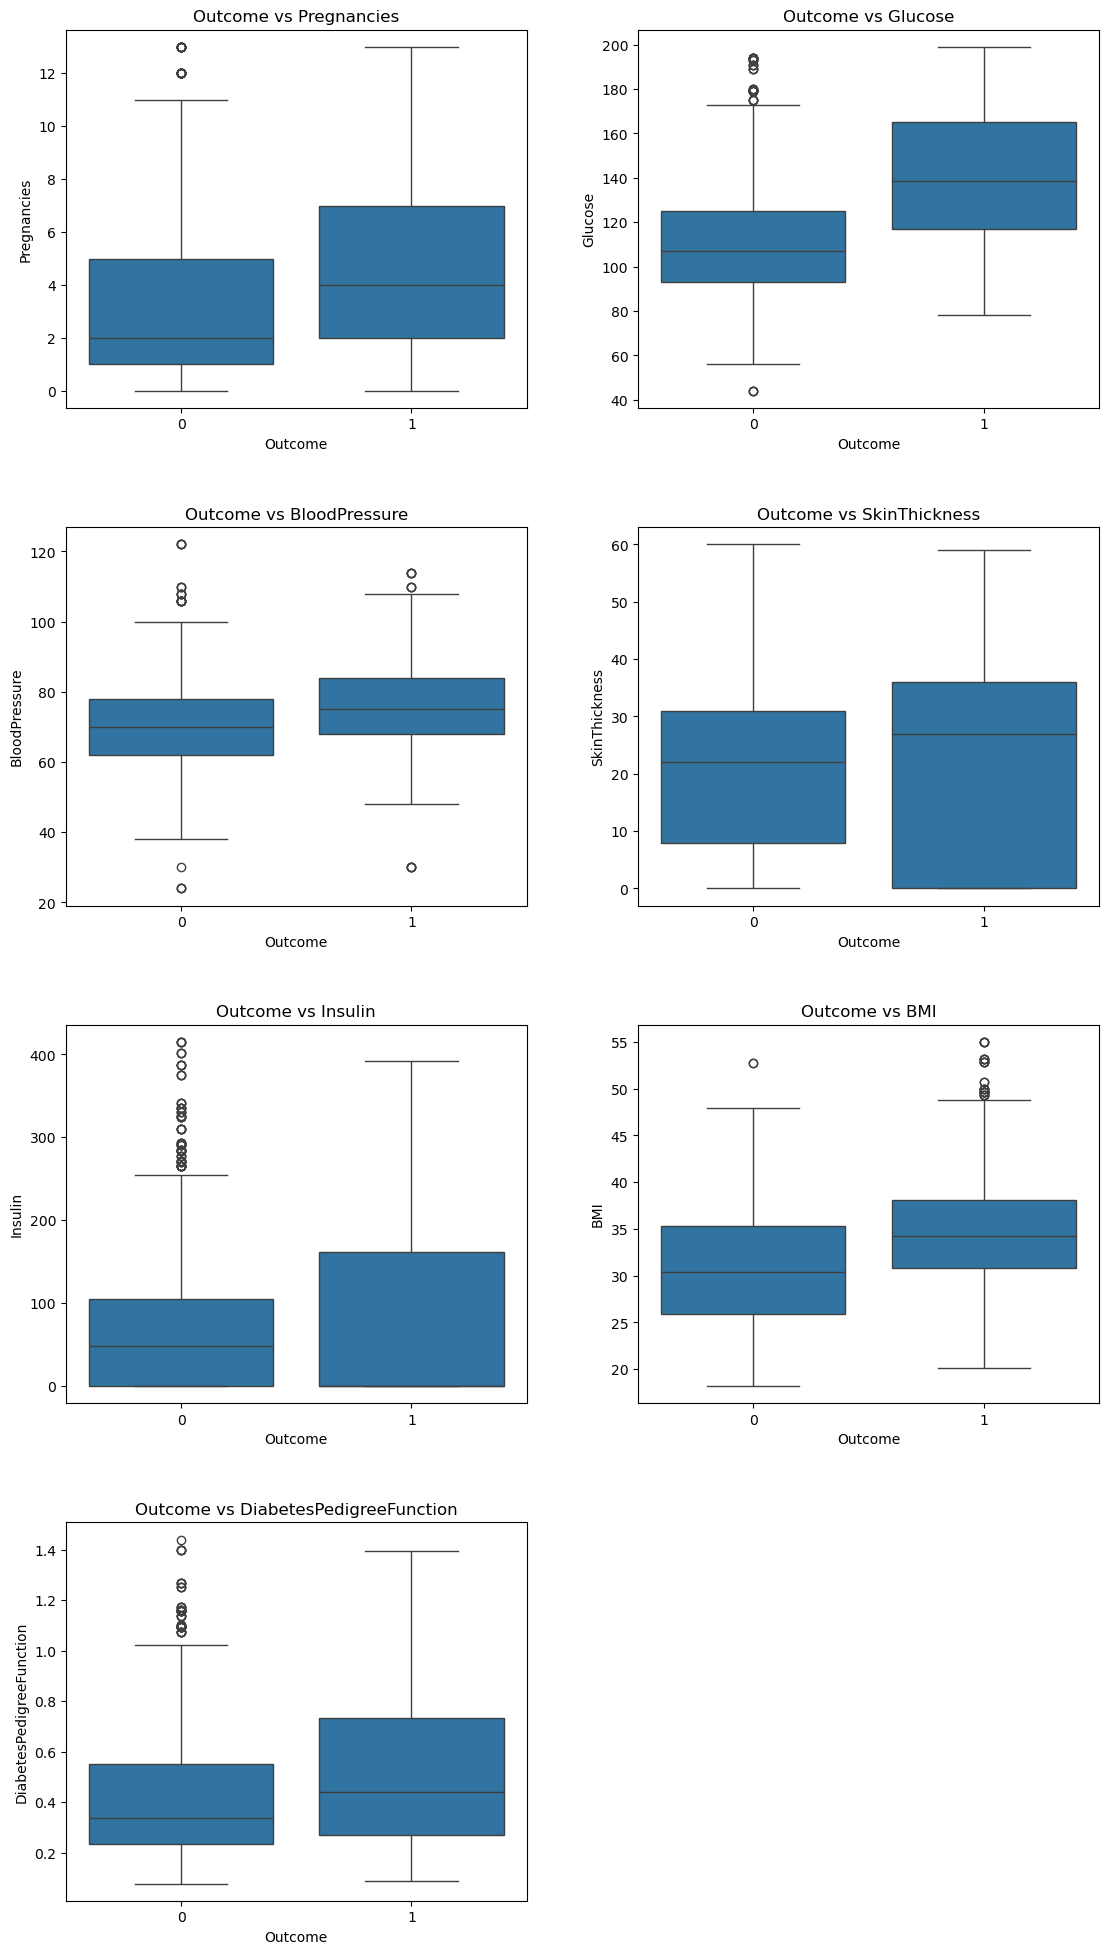

In [141]:
# Create box plots
fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    ax = axes[i]
    sns.boxplot(data=df, x=outcome_column, y=feature, ax=ax)
    ax.set_title(f'{outcome_column} vs {feature}', fontsize=12)
    ax.set_xlabel(outcome_column, fontsize=10)
    ax.set_ylabel(feature, fontsize=10)

# Remove any empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(pad=4.0)
plt.show()

### Correlation matrix

#### A correlation matrix is a table showing correlation coefficients between variables. For a dataset like the diabetes dataset, a correlation matrix is crucial. By analyzing the correlation matrix, we can make informed decisions about feature selection, model building, and data preprocessing. 

### Which features have the highest correlation with diabetes?
    - Glucose, BMI, and Age are among the strongest predictors of diabetes.


Text(0.5, 1.0, 'Correlation Matrix')

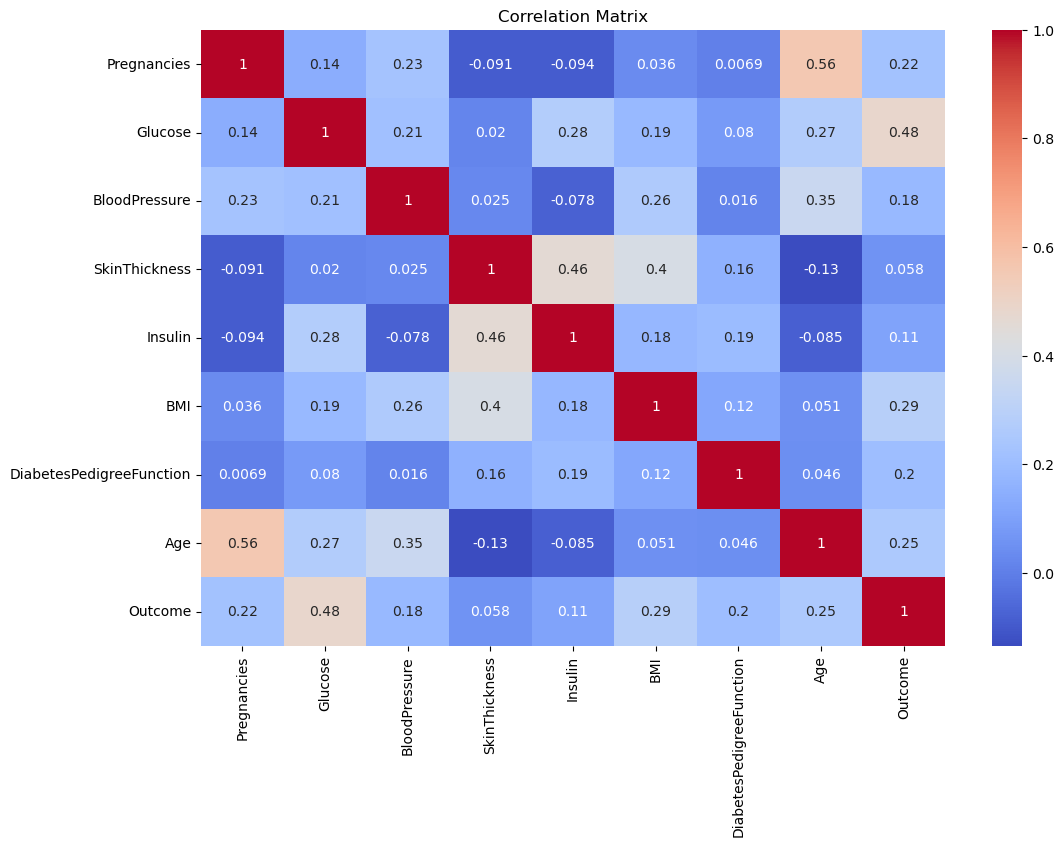

In [145]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
# plt.show()

## MODEL DATA

#### Selecting important features based on correlation and domain knowledge

In [149]:
# Select only the specified features from the dataframe
selected_features = ['Pregnancies', 'Glucose', 'BMI', 'Age']
X = df[selected_features]
y = df['Outcome']

#Split the data for training and test of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Initializing machine learning models

#### Once the data has been cleaned and analyzed properly, we can go to the next step which is testing the data on different algorithms.

In [152]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Dictionary to store performance metrics
performance_metrics = {}

### Training and evaluation of the models

#### Here the model is evaluated on 5 parameters and done a thorough comparison.

- Accuracy — Measures overall correctness.
- Precision & Recall — Important when dealing with medical predictions.
- F1 Score — Balances precision and recall.
- ROC AUC Score — Evaluates the model’s ability to distinguish between diabetic and non-diabetic cases.

In [156]:
# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC Score': roc_auc_score(y_test, y_pred)
    }
    performance_metrics[model_name] = metrics

    # Print classification report
    print(f'Classification Report for {model_name}:\n')
    print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       512
           1       0.71      0.58      0.64       232

    accuracy                           0.79       744
   macro avg       0.77      0.74      0.75       744
weighted avg       0.79      0.79      0.79       744

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       512
           1       0.95      0.97      0.96       232

    accuracy                           0.97       744
   macro avg       0.97      0.97      0.97       744
weighted avg       0.97      0.97      0.97       744

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       512
           1       0.96      0.97      0.97       232

    accuracy                           0.98       

## VISUALIZE RESULTS

#### From this model performance data, it can be observed that the Random Forest model has the best overall performance, with the highest accuracy and F1 Score, making it the most reliable model for predicting diabetes in this dataset.

                     Accuracy  Precision    Recall  F1 Score  ROC AUC Score
Logistic Regression  0.794355   0.706806  0.581897  0.638298       0.736261
Decision Tree        0.974462   0.949367  0.969828  0.959488       0.973195
Random Forest        0.978495   0.961538  0.969828  0.965665       0.976125


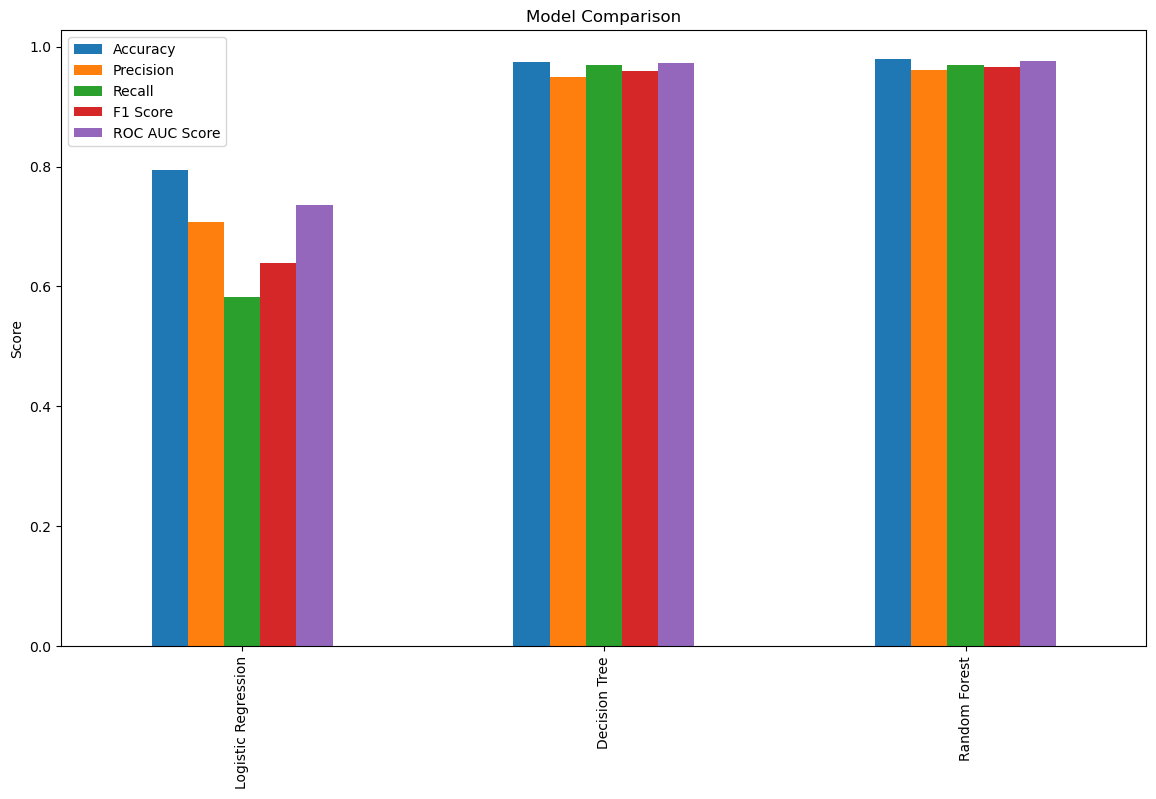

In [160]:
# Convert performance metrics to DataFrame for easier comparison
metrics_df = pd.DataFrame(performance_metrics).T
print(metrics_df)

# Plot performance metrics
metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.show()

#### Conclusion: This project showcased how machine learning can help predict diabetes using healthcare data. We learned that feature selection, data visualization, and model comparison are key to building a reliable model.